In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


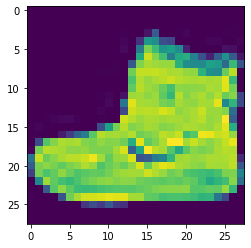

In [ ]:
first_train_image = training_images[0]
plt.imshow(first_train_image)

In [ ]:
np.set_printoptions(linewidth=150)
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

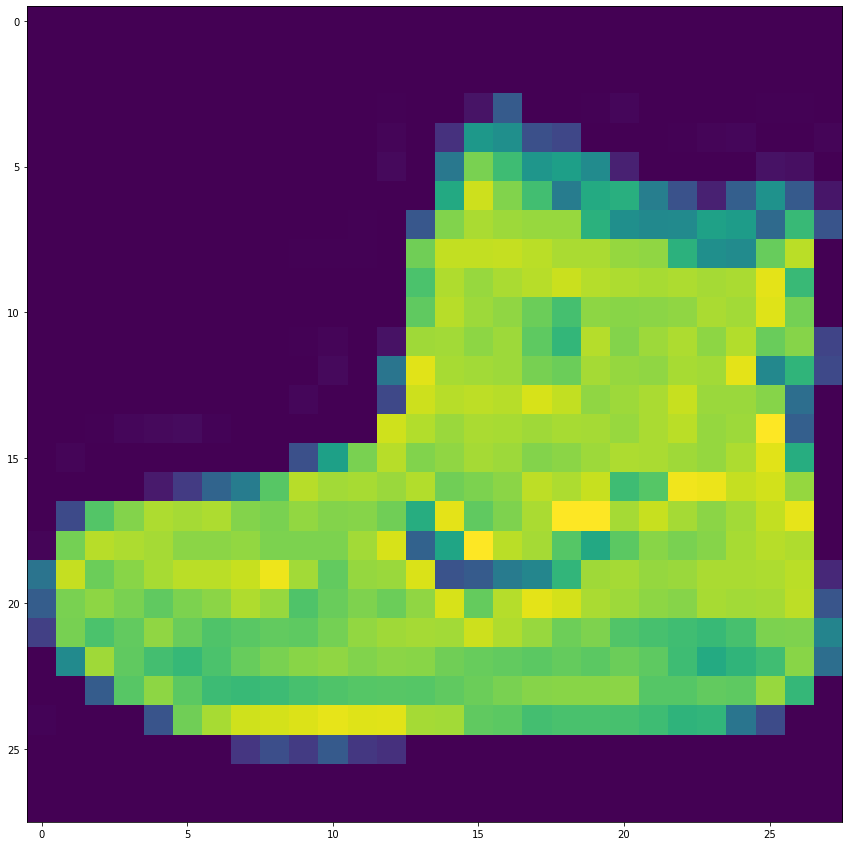

In [ ]:
first_train_image = training_images[0]
plt.figure(figsize=(30, 15))
plt.imshow(first_train_image)

In [ ]:
first_train_image.shape

(28, 28)

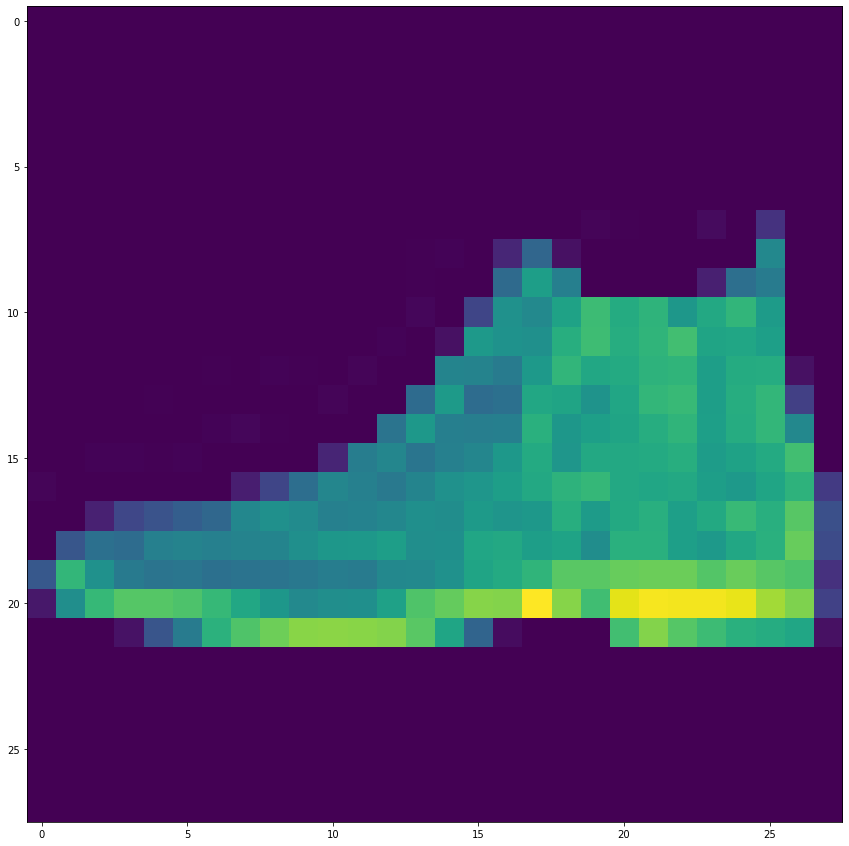

In [ ]:
first_test_image = test_images[0]
plt.figure(figsize=(30,15))
plt.imshow(first_test_image)

In [ ]:
np.set_printoptions(linewidth=150)
print(test_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   0  27  84  11   

In [ ]:
first_test_image.shape

(28, 28)

In [ ]:
training_images = training_images / 255.0          #Data normalization
test_images = test_images / 255.0

In [ ]:
np.min(training_images[0]), np.max(training_images[0])  #probability

(0.0, 1.0)

In [ ]:
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128,activation=tf.nn.relu),    # relu [x>0 and 1 to infinity]
                                tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                ])

In [ ]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6328 - accuracy: 0.7796
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8597
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.8938


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(test_images, test_images_labels)

NameError: ignored

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

In [ ]:
print(test_images_lables[0])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached to 60% accuracy so i am cancelling training process")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0          #Data normalization
test_images = test_images / 255.0


In [ ]:
model = keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512,activation=tf.nn.relu),    # relu [x>0 and 1 to infinity]
                                tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                tf.keras.layers.Dense(64,activation=tf.nn.relu),
                                tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                ])

In [ ]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,
          training_labels,
          epochs=5,
          callbacks[callbacks])